In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings (optional)
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load the dataset
df = pd.read_csv("heart_disease.csv")

# Display the first few rows of the dataset
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [5]:
# Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
# Check for missing values
df.isnull().sum()


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [9]:
# Descriptive statistics of the dataset
df.describe()


,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


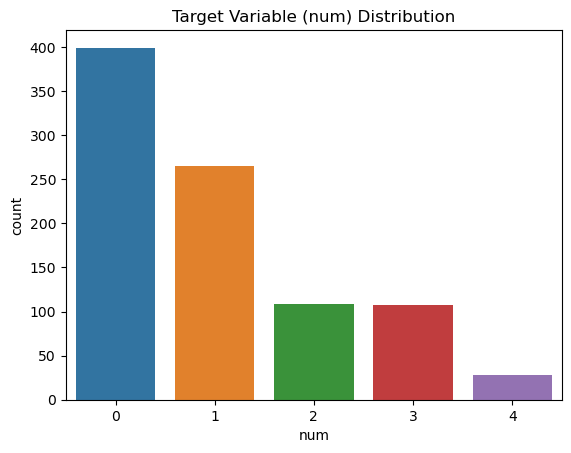

In [15]:
# Visualize the distribution of the target variable
sns.countplot(x='num', data=df)
plt.title('Target Variable (num) Distribution')
plt.show()


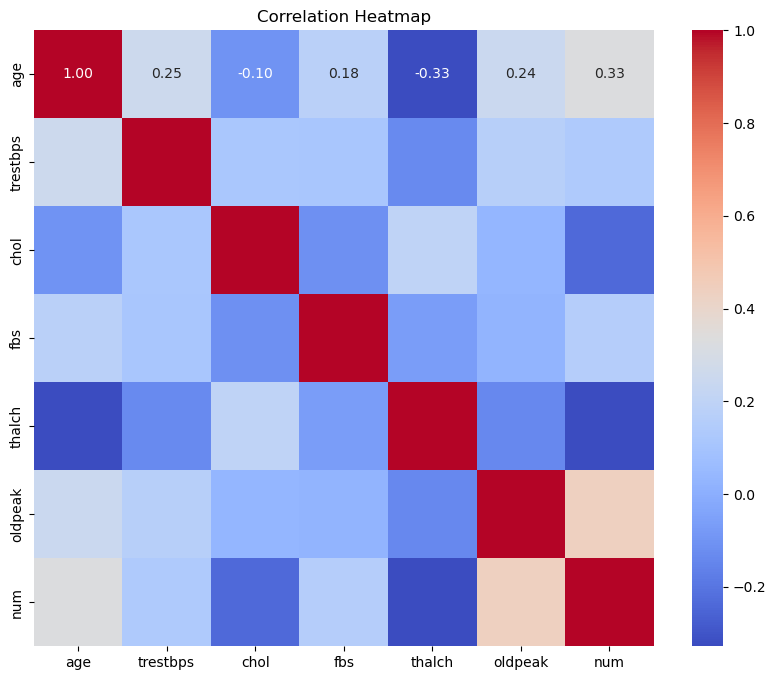

In [17]:

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


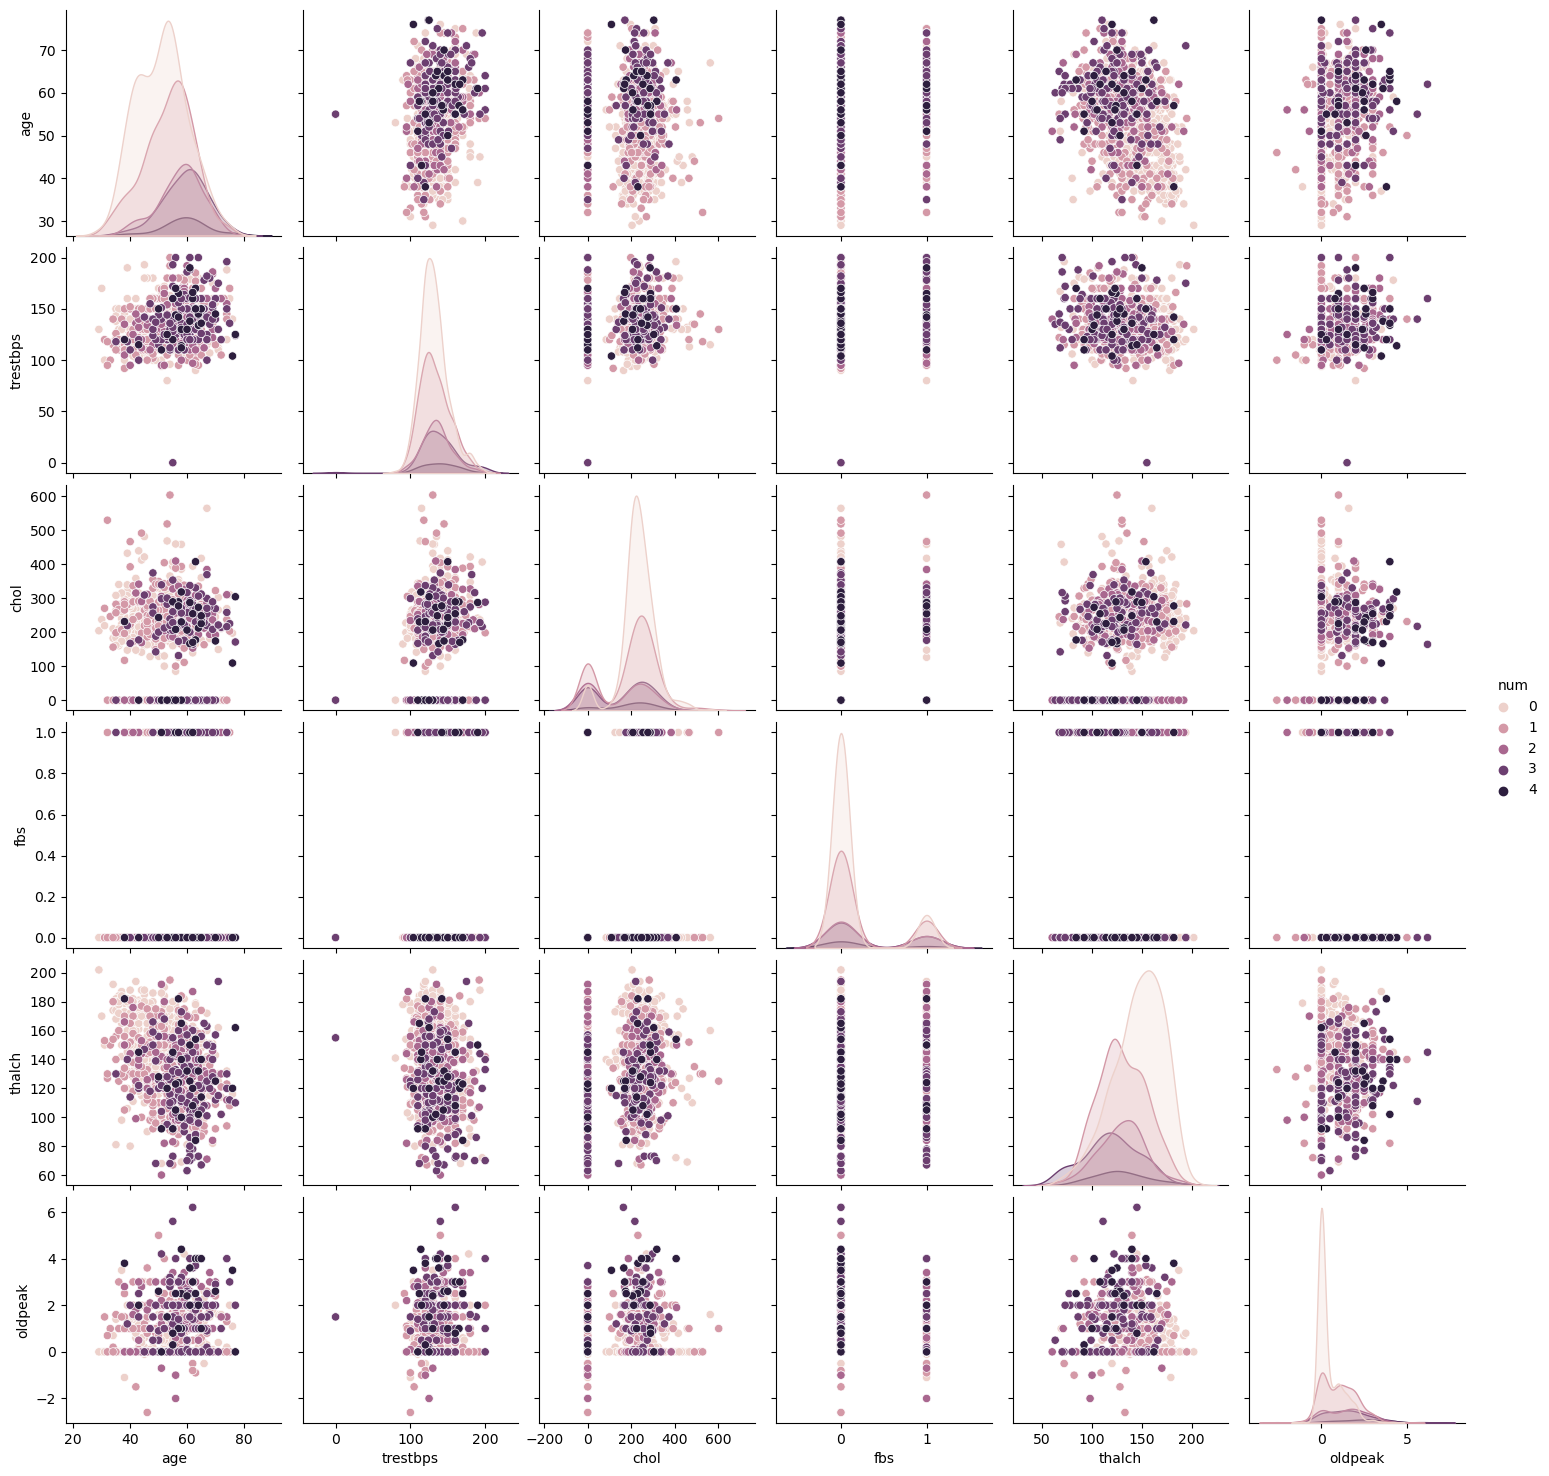

In [21]:
# Pairplot for visualizing relationships between features
sns.pairplot(df, hue='num', diag_kind='kde')
plt.show()


In [45]:
# Split the data into features and target variable
X = df.drop('num', axis=1)
y = df['num']


In [47]:
## label_encoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

X_train['sex'] = label_encoder.fit_transform(X_train['sex'])
X_test['sex'] = label_encoder.transform(X_test['sex'])


In [51]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
print(X_train.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal'],
      dtype='object')


In [53]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


ValueError: could not convert string to float: 'Male'

In [55]:
print(X_train.dtypes)


age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
dtype: object


In [57]:
# Convert boolean to integer
X_train['fbs'] = X_train['fbs'].astype(int)
X_test['fbs'] = X_test['fbs'].astype(int)

# Convert categorical columns to dummies
cat_cols = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']

X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

# Align columns in train and test sets
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Train Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [59]:
# Predict on the test set
y_pred = model.predict(X_test)


In [78]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.50

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.72        89
           1       0.35      0.38      0.36        48
           2       0.22      0.18      0.20        22
           3       0.25      0.29      0.27        17
           4       0.00      0.00      0.00         6

    accuracy                           0.50       182
   macro avg       0.31      0.31      0.31       182
weighted avg       0.50      0.50      0.50       182


Confusion Matrix:
[[64 16  5  4  0]
 [15 18  6  8  1]
 [ 4  9  4  2  3]
 [ 4  6  2  5  0]
 [ 1  3  1  1  0]]


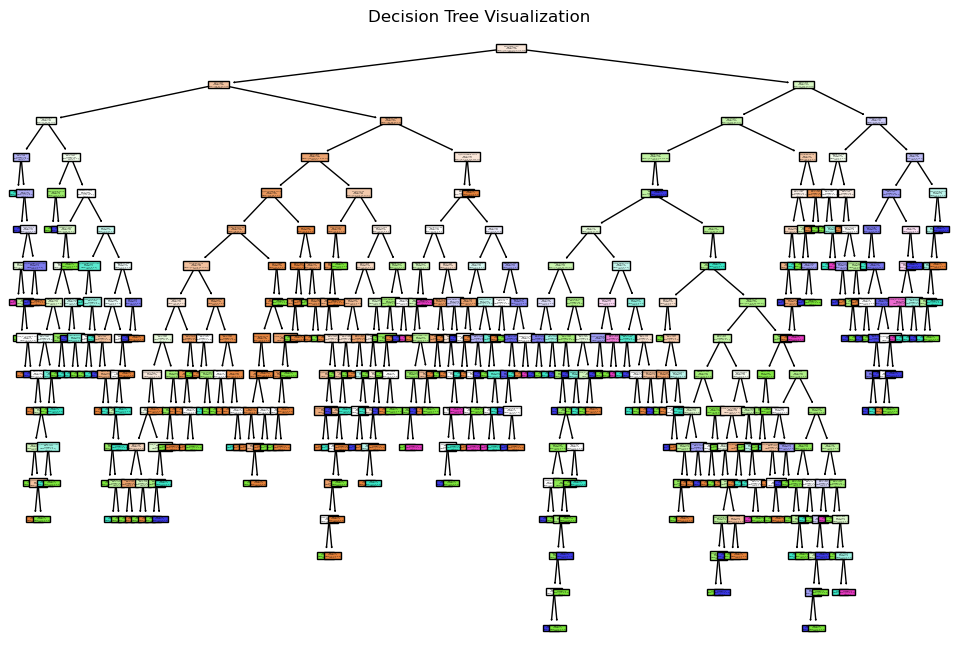

In [79]:
# Visualize the Decision Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(
    model,
    feature_names=X_train.columns,
    class_names=[str(cls) for cls in model.classes_],  # Dynamically get class names
    filled=True
)
plt.title('Decision Tree Visualization')
plt.show()



In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.5592347661785546


In [100]:
y_pred_best = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy on Test Set:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
", grid_search.best_score_)


SyntaxError: unterminated string literal (detected at line 8) (1117225670.py, line 8)

In [86]:
# Use the best model for evaluation
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy on Test Set: {accuracy_best:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))


Best Model Accuracy on Test Set: 0.57

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.84      0.77        89
           1       0.39      0.54      0.46        48
           2       0.00      0.00      0.00        22
           3       0.22      0.12      0.15        17
           4       0.00      0.00      0.00         6

    accuracy                           0.57       182
   macro avg       0.26      0.30      0.28       182
weighted avg       0.47      0.57      0.51       182


Confusion Matrix:
[[75 13  0  1  0]
 [21 26  0  1  0]
 [ 4 13  0  5  0]
 [ 5 10  0  2  0]
 [ 2  4  0  0  0]]


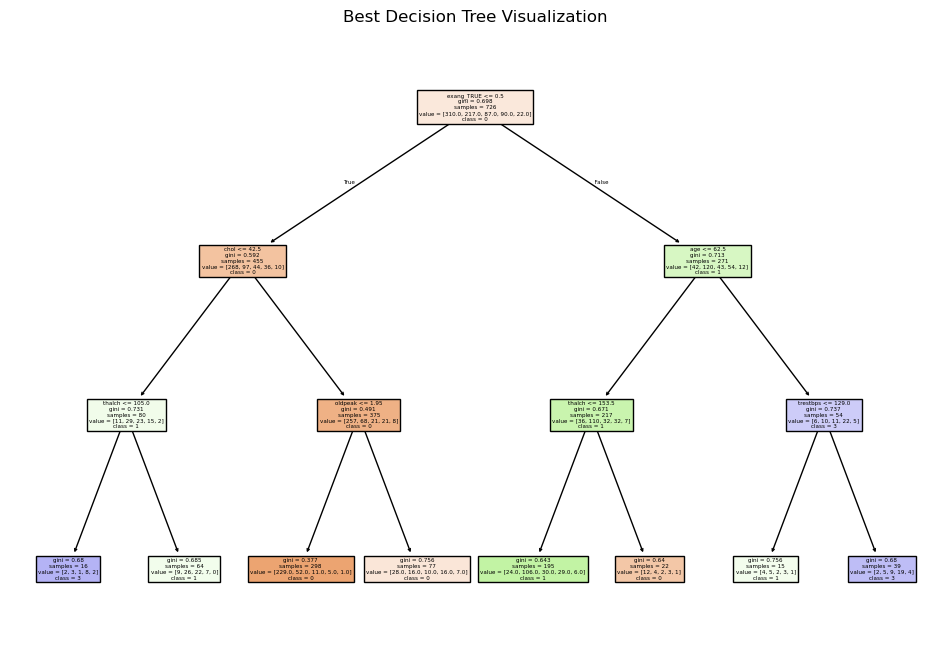

In [102]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(
    best_model,
    feature_names=X_train.columns,
    class_names=[str(cls) for cls in best_model.classes_],
    filled=True
)
plt.title('Best Decision Tree Visualization')
plt.show()



In [108]:
# Answer to Question 1: Common Hyperparameters in Decision Tree Models

print(
    "Some common hyperparameters in decision tree models are:\n\n"
    "- max_depth – It controls the maximum depth of the tree. If it's too large, the tree may overfit the data. If it's too small, the tree may underfit and not capture patterns properly.\n\n"
    "- min_samples_split – It sets the minimum number of samples required to split a node. Higher values result in a simpler tree and reduce overfitting.\n\n"
    "- min_samples_leaf – It determines the minimum number of samples required in each leaf node. Larger values make the tree more general and reduce overfitting.\n\n"
    "- criterion – It decides the split quality measure. Common values are ‘gini’ and ‘entropy’. Gini is faster, while entropy is more informative but slower.\n\n"
    "Tuning these hyperparameters helps in building a tree that balances between underfitting and overfitting, resulting in better model performance."
)


Some common hyperparameters in decision tree models are:

- max_depth – It controls the maximum depth of the tree. If it's too large, the tree may overfit the data. If it's too small, the tree may underfit and not capture patterns properly.

- min_samples_split – It sets the minimum number of samples required to split a node. Higher values result in a simpler tree and reduce overfitting.

- min_samples_leaf – It determines the minimum number of samples required in each leaf node. Larger values make the tree more general and reduce overfitting.

- criterion – It decides the split quality measure. Common values are ‘gini’ and ‘entropy’. Gini is faster, while entropy is more informative but slower.

Tuning these hyperparameters helps in building a tree that balances between underfitting and overfitting, resulting in better model performance.


In [110]:
# Answer to Question 2: Difference Between Label Encoding and One-Hot Encoding

print(
    "Label Encoding assigns a unique number to each category. For example, Male → 0, Female → 1.\n"
    "It is useful when the categories have some order, like Low, Medium, High.\n\n"
    "One-Hot Encoding creates separate columns for each category, representing them as 0s and 1s.\n"
    "For example, Red → [1, 0, 0], Blue → [0, 1, 0], and Green → [0, 0, 1].\n"
    "This is preferred when categories have no order, like colors or cities.\n\n"
    "Label Encoding is used for ordered data, while One-Hot Encoding is better for unordered data."
)


Label Encoding assigns a unique number to each category. For example, Male → 0, Female → 1.
It is useful when the categories have some order, like Low, Medium, High.

One-Hot Encoding creates separate columns for each category, representing them as 0s and 1s.
For example, Red → [1, 0, 0], Blue → [0, 1, 0], and Green → [0, 0, 1].
This is preferred when categories have no order, like colors or cities.

Label Encoding is used for ordered data, while One-Hot Encoding is better for unordered data.
